# Random Forest Classifier with Synthetic Data



In [45]:
# -----------------------------------------
# 📘 Practical: Random Forest Classifier
# 🎯 Objective: Learn how to use Random Forest on synthetic data
# 👨‍🏫 For: ML Students, Google Colab compatible
# -----------------------------------------

# ✅ Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix,
                             classification_report,
                             ConfusionMatrixDisplay)

# Set the theme for plots
sns.set(style='whitegrid')


#✅ Step 2: Generate Synthetic Data

In [46]:
# 🔧 We generate synthetic binary classification data using sklearn's `make_classification`
X, y = make_classification(n_samples=1000,        # Total 1000 samples
                           n_features=10,         # 10 total features
                           n_informative=6,       # 6 are informative
                           n_redundant=2,         # 2 are linear combinations
                           n_classes=2,           # Binary classification
                           random_state=42)

# Create a DataFrame for better understanding
feature_names = [f'Feature_{i}' for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feature_names)
df['Target'] = y

# 🧾 Show the first few rows
df.head()


,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Target
0,-1.030931,1.391626,0.547274,0.928932,-1.738880,1.250002,1.332551,1.578256,2.124722,-0.318434,0
1,-2.766254,1.247870,-0.303691,1.083145,0.710836,1.968202,-1.794192,2.346422,1.700778,-0.001190,1
2,-0.558987,0.299849,1.527071,0.360442,-1.360209,1.100793,-0.755951,1.331933,2.041105,-0.824404,0
3,-1.350289,-2.046078,-0.614264,0.126459,-0.783923,5.895026,-0.915477,-3.184768,-0.399260,-3.920960,0
4,-0.275754,-0.728495,0.027727,-0.660834,-1.928161,3.544945,1.446944,-1.111662,0.313766,-2.376528,0


#✅ Step 3: Split the Data

In [47]:
# ✂️ Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    df[feature_names], df['Target'], test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples :", X_test.shape[0])


Training samples: 800
Testing samples : 200


#✅ Step 4: Train the Random Forest Model

In [48]:
# 🌲 Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100,     # 100 trees
                                  max_depth=5,          # Max depth of tree
                                  random_state=42)

# 🚀 Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, random_state=42)

#✅ Step 5: Evaluate the Model

🔍 Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.73      0.81       113
           1       0.72      0.92      0.81        87

    accuracy                           0.81       200
   macro avg       0.82      0.82      0.81       200
weighted avg       0.83      0.81      0.81       200



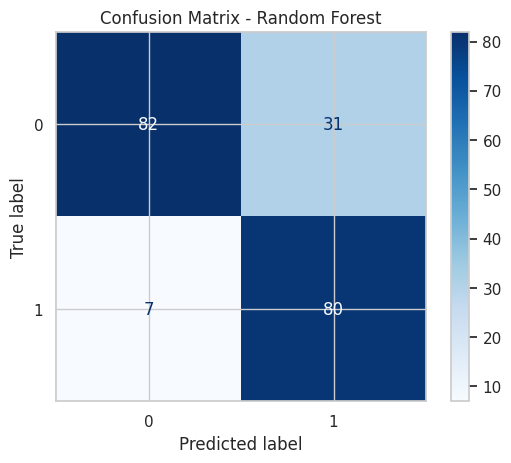

In [49]:
# 🔍 Predict on the test set
y_pred = rf_model.predict(X_test)

# 📊 Classification Report
print("🔍 Classification Report:\n")
print(classification_report(y_test, y_pred))

# 📉 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)

# 📌 Plot the confusion matrix
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()


#✅ Step 6: Visualize Feature Importances

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


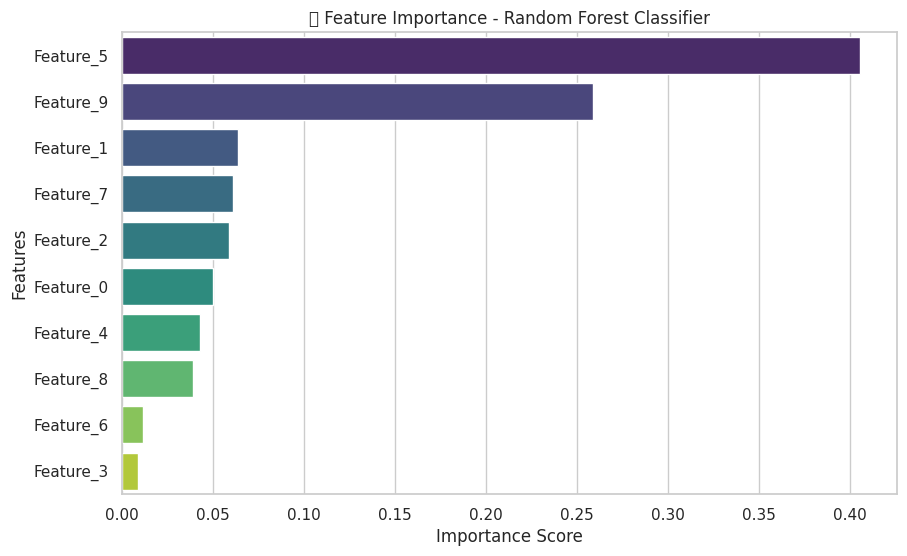

In [50]:
# 📊 Feature importance from the trained model
importances = rf_model.feature_importances_

# Combine feature names and their importances
feat_importances = pd.Series(importances, index=feature_names)
feat_importances = feat_importances.sort_values(ascending=False)

# 📈 Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importances.values, y=feat_importances.index, palette='viridis')
plt.title("🌟 Feature Importance - Random Forest Classifier")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


#📘 Teacher Notes:
This is a beginner-friendly example that uses synthetic data so students don’t need to download files.

Encourage students to experiment with parameters like:

n_estimators, max_depth

min_samples_split, bootstrap

Ask students to compare the performance of DecisionTreeClassifier and RandomForestClassifier.



#🔧 GridSearchCV for hyperparameter tuning
These help students:

Understand model generalization

Learn best hyperparameter selection

Compare base vs tuned model performance

#🔁 Step 7: Cross-Validation and Grid Search

In [51]:
from sklearn.model_selection import cross_val_score, GridSearchCV

# -----------------------------------------------
# 🔁 1. K-Fold Cross Validation on Base Model
# -----------------------------------------------

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

print("📊 Cross-Validation Accuracy Scores:", cv_scores)
print("✅ Mean Accuracy: {:.4f}".format(cv_scores.mean()))



📊 Cross-Validation Accuracy Scores: [0.8875  0.86875 0.8625  0.8875  0.85625]
✅ Mean Accuracy: 0.8725


#🎯 Step 8: Hyperparameter Tuning with GridSearchCV

In [52]:
# -----------------------------------------------
# 🔧 2. Grid Search for Best Hyperparameters
# -----------------------------------------------

# Define parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],         # Number of trees
    'max_depth': [3, 5, 7, None],           # Max depth of tree
    'min_samples_split': [2, 5, 10],        # Min samples to split
    'criterion': ['gini', 'entropy']        # Splitting criteria
}

# Initialize the GridSearch
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1,          # Use all processors
                           verbose=1)

# 🔍 Fit Grid Search on training data
grid_search.fit(X_train, y_train)

# 🌟 Best model from GridSearch
best_rf = grid_search.best_estimator_
print("🔧 Best Parameters from GridSearchCV:", grid_search.best_params_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
🔧 Best Parameters from GridSearchCV: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}


#✅ Step 9: Evaluate Tuned Model

📈 Classification Report for Tuned Model:

              precision    recall  f1-score   support

           0       0.92      0.79      0.85       113
           1       0.77      0.91      0.83        87

    accuracy                           0.84       200
   macro avg       0.84      0.85      0.84       200
weighted avg       0.85      0.84      0.84       200



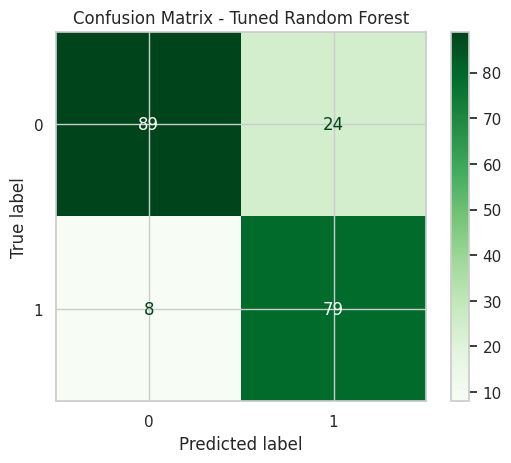

In [53]:
# Predict using tuned model
y_pred_tuned = best_rf.predict(X_test)

# Classification report
print("📈 Classification Report for Tuned Model:\n")
print(classification_report(y_test, y_pred_tuned))

# Confusion Matrix
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
disp_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_tuned, display_labels=best_rf.classes_)

# 📉 Plot Confusion Matrix
disp_tuned.plot(cmap='Greens')
plt.title("Confusion Matrix - Tuned Random Forest")
plt.show()


#📊 Optional: Compare Accuracy

In [54]:
# Compare original vs tuned
base_accuracy = (y_pred == y_test).mean()
tuned_accuracy = (y_pred_tuned == y_test).mean()

print(f"⚖️ Base Model Accuracy:  {base_accuracy:.4f}")
print(f"⚡ Tuned Model Accuracy: {tuned_accuracy:.4f}")


⚖️ Base Model Accuracy:  0.8100
⚡ Tuned Model Accuracy: 0.8400
